In [170]:
import pydataset as ds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
import pylab
import scipy.stats as stats
import random
from collections import Counter
from googletrans import Translator
from sklearn import preprocessing
from sklearn.cross_decomposition import CCA
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [171]:
data = pd.read_excel('https://github.com/junaart/ForStudents/blob/master/Big_Data/Zachet/DataSets/4.xlsx?raw=true')
display(data)

,town1,Avg-Avg-О2011,Avg-Avg-О2012,Avg-Avg-О2013,Avg-Avg-О2014,Avg-Avg-О202,Avg-Avg-О203,Avg-Avg-О204,Avg-Avg-О205,Avg-Avg-О211,Avg-Avg-О212,Avg-Avg-О213,Avg-Avg-О221,Avg-Avg-О222,Avg-Avg-О223,Avg-Avg-О224,Avg-Avg-О23,Avg-Avg-О24
0,Абакан,24.125000,9.275000,11.900000,7.400000,45.325000,3.025000,7.045000,0.250000,734554.250000,135482.275000,1041.650000,17608.100000,89.400000,5841.525000,1124.175000,1145.375000,11561.400000
1,Азовский район,4.000000,2.333333,1.666667,0.000000,0.000000,2.333333,8.000000,0.666667,10070.633333,7003.233333,11.400000,10363.366667,0.000000,5895.166667,0.000000,0.000000,10599.500000
2,Аксайский район,35.250000,7.500000,39.125000,5.000000,1.750000,4.975000,61.350000,46.250000,77963.247500,47456.745000,538.000000,156383.575000,0.000000,2713.625000,1812.750000,0.000000,68427.425000
3,Алексеевкий район,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1777.500000,533.350000,0.000000,1230.500000,0.000000,0.000000,0.000000,0.000000,958.950000
4,Анапа,6.500000,2.000000,5.500000,0.000000,0.000000,3.000000,7.000000,0.000000,1262.150000,495.950000,6057.400000,13442.950000,0.000000,0.000000,0.000000,0.000000,7009.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,Южно-Сахалинск,19.650000,5.300000,22.275000,4.250000,15.125000,17.490000,15.045000,19.695000,221361.643200,190348.883500,954.802200,35331.830000,753.150000,70031.370000,31804.235000,27607.015000,75425.775000
277,Якутск,35.810833,11.278333,22.063333,19.741667,20.868333,26.770000,21.188333,17.396667,72362.614417,53238.751667,205.659583,118284.130500,88.010000,19476.756667,3409.351667,1829.645000,85492.451733
278,Ялта,35.666667,11.833333,31.500000,2.063333,1.666667,12.128333,128.416667,42.800000,6913.950000,67449.916667,129.366667,140740.116667,0.000000,1416.883333,1202.600000,1050.000000,101185.283333
279,Ярославль,56.517857,18.764286,29.732143,32.877381,87.051905,5.051786,3.180357,2.892857,148319.210000,96814.466548,3421.656786,12507.507143,909.857143,13176.189286,29893.739286,4158.464286,18223.429524


ПЕРВЫЙ БЛОК

In [201]:
#Реализуем функцию среднего геометрического
def my_gmean(x):
    r = 1
    for i in x:
        r *= i
    return r**(1/len(x))

#Пункт 1

first_pok = data['Avg-Avg-О24']

#Взял копию, чтобы посчитать средние значения, если будет встречаться 0, происходит умножение на 0 и коэффициенты обнуляются.
first_pok_copy = data[(data['Avg-Avg-О24'] > 0)]['Avg-Avg-О24']
pd.Series(first_pok)
#display(first_pok)

mean_val = statistics.mean(first_pok_copy)
harm_val = statistics.harmonic_mean(first_pok_copy)
geom_val = my_gmean(list(first_pok_copy))
med_val = statistics.median(first_pok_copy)

#Среднее геометрическое пытался вычислить вручную, т.к. в моей библиотеке statistics почему-то нет метода geometric_mean.
#Но вручную он не считается, скорее всего, из-за больших значений в самом фрейме. 
#Я просил проверить свой код у тех, у кого есть встроенный метод, там все считается как надо.

#sys_geom_val = statistics.geometric_mean(first_pok_copy)
#print('Среднее геометрическое', sys_geom_val)

print('Среднее арифметическое', mean_val)
print('Среднее гармоническое', harm_val)
print('Среднее геометрическое', geom_val),
print('Медиана', med_val)

Среднее арифметическое 83841.92460023685
Среднее гармоническое 7276.787072712012
Среднее геометрическое inf
Медиана 25939.510000000002


In [203]:
#Пункт 2

q1 = np.quantile(np.array(first_pok), 0.25)
print('Первый квартиль', q1)
print('-----------------')
q3 = np.quantile(np.array(first_pok), 0.75)
print('Третий квартиль', q3)

Первый квартиль 11479.4
-----------------
Третий квартиль 70035.70225


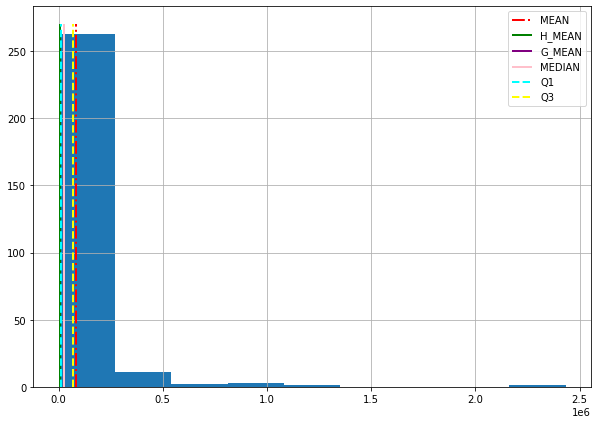

In [205]:
#Пункт 3

#Cоздаем область Figure (экземпляр класса figure).
fig = plt.figure(figsize=(10,7))

#В метод add_subplot пишем первую строку, первый столбец и первую ячейка на сетке Figure.
tp = fig.add_subplot(111)

#Взял копию исходного показателя, без копии выпадает Warning, но график строится точно такой же.
fs = first_pok.copy()

#Беру распределение из лекции.
tp.hist(fs,bins=int(1+math.log2(len(fs))),rwidth=1)

#Используем метод для построения вертикальных линий ('x', 'ymin', 'ymax').
tp.vlines(mean_val,0,270,color='red',ls='-.',lw=2,label='MEAN')
tp.vlines(harm_val,0,270,color='green',ls='-',lw=2,label='H_MEAN')
tp.vlines(geom_val,0,270,color='purple',ls='-',lw=2,label='G_MEAN')
tp.vlines(med_val,0,270,color='pink',ls='-',lw=2,label='MEDIAN')
tp.vlines(q1,0,270,color='cyan',ls='--',lw=2,label='Q1')
tp.vlines(q3,0,270,color='yellow',ls='--',lw=2,label='Q3')

#Включаем сетку.
plt.grid(True)
plt.legend()
plt.show()

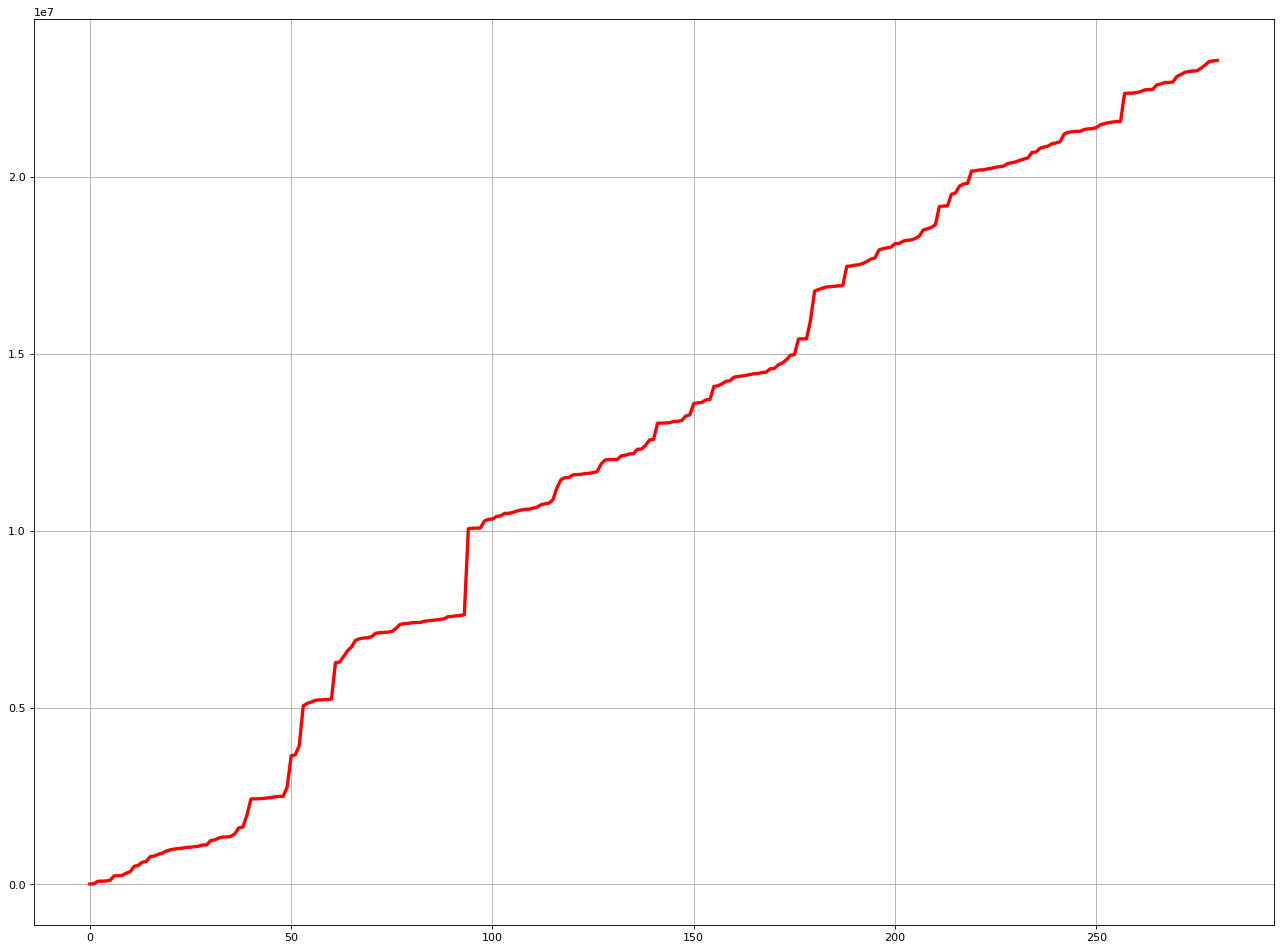

In [206]:
#Пункт 4

#Высчитываем накопленную сумму.
AccumulateData = np.cumsum(first_pok)

fig = plt.figure(figsize=(20, 15), dpi=80)
tp = fig.add_subplot(111)
tp.plot(first_pok.index, AccumulateData, ls = '-', lw = 3, color = 'red')

plt.grid(True)
plt.show()

In [207]:
#Пункт 5

g = np.histogram(first_pok)
display(g)

Mid_inter = [(g[1][i] + g[1][i+1])/2 for i in range(len(g[0]))]
Inter = [str(g[1][i]) + '-' + str(g[1][i+1]) for i in range(len(g[0]))]
Nacop_chastota = np.cumsum(g[0])

newd = pd.DataFrame()
newd['Интервалы'] = Inter
newd['Середина интервала'] = Mid_inter
newd['Частота'] = g[0]
newd['Накопленная частота'] = Nacop_chastota
display(newd)

(array([261,  11,   3,   3,   2,   0,   0,   0,   0,   1], dtype=int64),
 array([      0.     ,  243380.30025,  486760.6005 ,  730140.90075,
         973521.201  , 1216901.50125, 1460281.8015 , 1703662.10175,
        1947042.402  , 2190422.70225, 2433803.0025 ]))

,Интервалы,Середина интервала,Частота,Накопленная частота
0,0.0-243380.30025,1.216902e+05,261,261
1,243380.30025-486760.6005,3.650705e+05,11,272
2,486760.6005-730140.90075,6.084508e+05,3,275
3,730140.90075-973521.201,8.518311e+05,3,278
4,973521.201-1216901.50125,1.095211e+06,2,280
5,1216901.50125-1460281.8015,1.338592e+06,0,280
6,1460281.8015-1703662.10175,1.581972e+06,0,280
7,1703662.10175-1947042.402,1.825352e+06,0,280
8,1947042.402-2190422.70225,2.068733e+06,0,280
9,2190422.70225-2433803.0025,2.312113e+06,1,281


In [208]:
#Среднее по сгруппированным данным
Avg_group = (newd['Середина интервала'] * newd['Частота']).sum()/newd['Частота'].sum()

#Ширина интервала
h = g[1][1] - g[1][0]
X_mo_1 = 0
F_mo = max(newd['Частота'])

#Мода для сгруппированных данных
Mode_group = X_mo_1 + h*(F_mo - 0)/(2*F_mo - 0 - 11)

Sum_half_chastot = 140.5

#Медиана для сгруппированных данных\n",
Median_group = 0 + h*(newd['Частота'].sum()/2 - 0)/261

print('Среднее по сгруппированным данным', Avg_group)
print('Мода по сгруппированным данным', Mode_group)
print('Медиана по сгруппированным данным', Median_group)

finalD = pd.DataFrame(columns=['Среднее без группировки','Среднее с группировкой','Медиана без группировки','Медиана с группировкой'])
finalD = finalD.append(pd.Series([mean_val, Avg_group, med_val, Median_group], index = finalD.columns), ignore_index = True)
display(finalD)

Среднее по сгруппированным данным 158933.39891770462
Мода по сгруппированным данным 124309.70325880626
Медиана по сгруппированным данным 131015.06584339081


,Среднее без группировки,Среднее с группировкой,Медиана без группировки,Медиана с группировкой
0,83841.9246,158933.398918,25939.51,131015.065843


In [209]:
#Пункт 6

R = first_pok.max() - first_pok.min()
Sr_kv_otkl = first_pok.std()
Disp = np.var(first_pok)
Koef_v = Sr_kv_otkl/first_pok.mean()*100
d = np.abs(first_pok-first_pok.mean()).sum()/len(first_pok)
interkvart_raz = np.quantile(first_pok, 0.75) - np.quantile(first_pok, 0.25)
Koef_osc = R/first_pok.mean()*100
otn_lin_otk = d/first_pok.mean()*100

print("Размах вариации", R)
print("Среднее квадратическое отклонение", Sr_kv_otkl)
print("Дисперсия", Disp)
print("Коэф. вариации", Koef_v)
print("Среднее линейное отклонение", d)
print("Интерквартильный размах", interkvart_raz)
print("Коэффициент осцилляции", Koef_osc)
print("Относительное линейное отклонение", otn_lin_otk)

Размах вариации 2433803.0025
Среднее квадратическое отклонение 204793.41742129833
Дисперсия 41791089926.4995
Коэф. вариации 246.89726448399978
Среднее линейное отклонение 93135.43242401649
Интерквартильный размах 58556.30225
Коэффициент осцилляции 2934.1729396215555
Относительное линейное отклонение 112.28331350474664


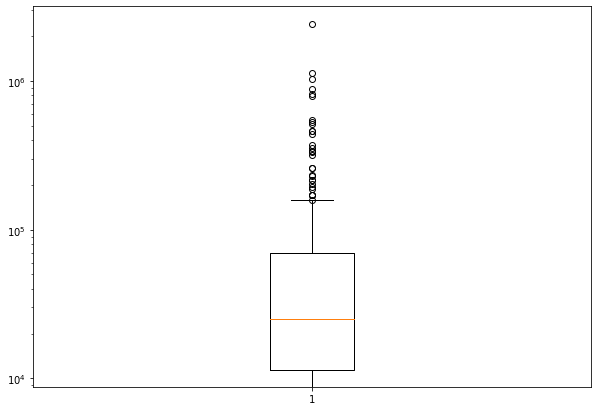

In [210]:
#Пункт 7

fig = plt.figure(figsize = (10,7))
tp = fig.add_subplot(111)

#Строим ящик с усами.
tp.boxplot(first_pok)

#Задаем шкалу для осу Y, без такого приёма график может сплющить.
plt.yscale('log')
plt.show()

In [211]:
m3 = ((first_pok - first_pok.mean())**3).sum()/len(first_pok)
Koef_Ass = m3/(first_pok.std())**3
print("Моментный коэффициент ассиметрии равен", Koef_Ass)

if Koef_Ass > 0:
    print("Распределение скошено вправо.")
else:
    print("Распределение скошено влево.")
    
if abs(Koef_Ass) < 0.25:
    print("Ассиметрия незначительная.")
elif 0.25 <= abs(Koef_Ass) < 0.5:
    print("Ассиметрия умеренная.")
else:
    print("Ассиметрия существенная (без оценки степени существенности).")

n = len(first_pok)
sa = math.sqrt((6*(n - 1))/((n + 1)*(n + 3)))
Step_sy = abs(Koef_Ass)/sa
print("Степень существенности", Step_sy)

if Step_sy > 3:
    print("Ассиметрия существенная (с учетом степени существенности).")
else:
    print("Ассиметрия несущественная (с учетом степени существенности).")

print("\n")

m4 = ((first_pok - first_pok.mean())**4).sum()/len(first_pok)
E = m4/(first_pok.std())**4-3
se = math.sqrt(24*n*(n-2)*(n-3)/((n-1)**2*(n+3)*(n+5)))
print("Коэффициент эксцесса равен", E)
print("Степень существенности", E/se)

if E > 0:
    print("Распределение островершинно.")
else:
    print("Распределение плосковершинно.")

if abs(E)/se > 3:
    print("Отклонение от нормального распределенния существенно.")
else:
    print("Отклонение от нормального распределенния не существенно")

Моментный коэффициент ассиметрии равен 6.94769292431606
Распределение скошено вправо.
Ассиметрия существенная (без оценки степени существенности).
Степень существенности 47.96999779190317
Ассиметрия существенная (с учетом степени существенности).


Коэффициент эксцесса равен 65.24335690174499
Степень существенности 227.6424420013674
Распределение островершинно.
Отклонение от нормального распределенния существенно.


Хоть ассиметрия получилась существенной, ящик с усами показал немалое кол-во выбросов, в таком случае коэффициент ассиметрии не имеет смысла.

ВТОРОЙ БЛОК

In [212]:
#Пункт 1

#Беру новый показатель
second_pok = data['Avg-Avg-О2011']

first_pok = data['Avg-Avg-О24']

g1 = np.histogram(data['Avg-Avg-О24'])
display(g1)

st_group = pd.DataFrame()
data_group = []
new_Inter = []

for i in range(len(g1[0])):
    group = []
    temp = 0
    left_inter = g1[1][i]
    right_inter = g1[1][i+1]
    new_Inter.append(str(left_inter) + '-' + str(right_inter))
    for i in first_pok:
        if left_inter < i <= right_inter:
            group.append(second_pok[temp])
            temp += 1
    data_group.append(np.array(group))
    
st_group['Интервалы'] = pd.Series(new_Inter)
st_group['Частота'] = pd.Series([len(x)  for x in data_group])
st_group['Внутрення средняя'] = pd.Series([(x.mean() if len(x) > 0 else 0) for x in data_group])
st_group['Внутренняя дисперсия'] = pd.Series([(x.std()**2 if len(x) > 0 else 0) for x in data_group])
display(st_group)

(array([261,  11,   3,   3,   2,   0,   0,   0,   0,   1], dtype=int64),
 array([      0.     ,  243380.30025,  486760.6005 ,  730140.90075,
         973521.201  , 1216901.50125, 1460281.8015 , 1703662.10175,
        1947042.402  , 2190422.70225, 2433803.0025 ]))

,Интервалы,Частота,Внутрення средняя,Внутренняя дисперсия
0,0.0-243380.30025,258,27.833291,1298.239224
1,243380.30025-486760.6005,11,16.217478,208.325677
2,486760.6005-730140.90075,3,21.125000,167.260417
3,730140.90075-973521.201,3,21.125000,167.260417
4,973521.201-1216901.50125,2,14.062500,101.253906
5,1216901.50125-1460281.8015,0,0.000000,0.000000
6,1460281.8015-1703662.10175,0,0.000000,0.000000
7,1703662.10175-1947042.402,0,0.000000,0.000000
8,1947042.402-2190422.70225,0,0.000000,0.000000
9,2190422.70225-2433803.0025,1,24.125000,0.000000


In [213]:
#Пункт 2

#Средняя внутригрупповая дисперсия
D_in_avg = (st_group['Внутренняя дисперсия']*st_group['Частота']).sum()/st_group['Частота'].sum()

#Межгрупповая дисперсия
Mean = data['Avg-Avg-О2011'].mean()
D_out = (((st_group['Внутрення средняя'] - Mean)**2)*st_group['Частота']).sum()/st_group['Частота'].sum()

D = data['Avg-Avg-О2011'].std()**2

cor_relation1 = math.sqrt(D_out/D)
print(cor_relation1)
cor_relation2 = math.sqrt(1 - D_in_avg/D)
print(cor_relation2)

0.07778904054915994
0.06571324524787897


In [214]:
print(D_in_avg/D + D_out/D)

1.001732904228551


In [215]:
np.corrcoef(first_pok, second_pok)

array([[1.        , 0.65834803],
       [0.65834803, 1.        ]])

Так как коэффициент корреляции находится в диапазоне от 0.5 до 0.8, корреляционная связь носит заметный характер.

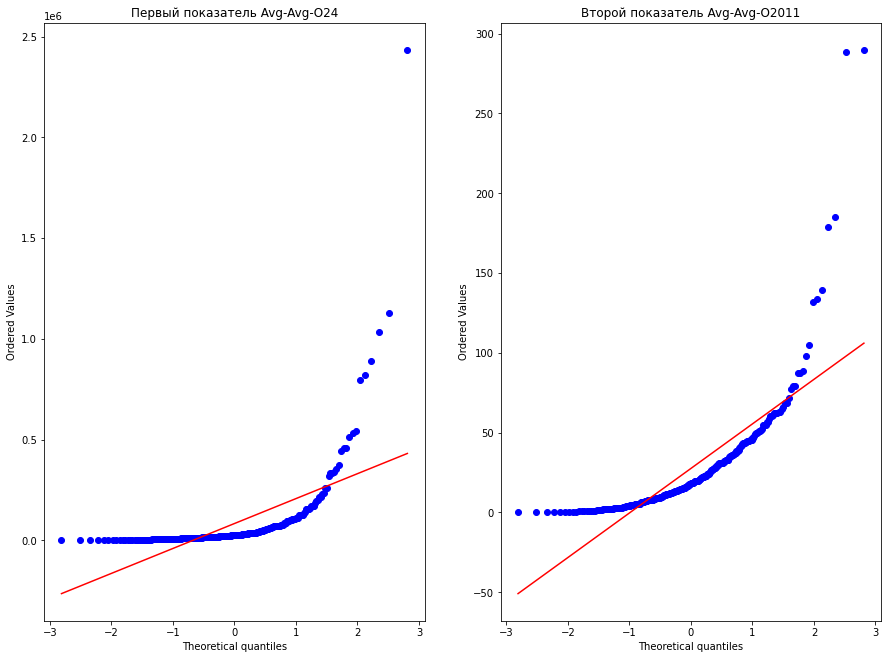

In [216]:
#Пункт 3

fig = plt.figure(figsize=(15,11))
tp1 = fig.add_subplot(121)
tp2 = fig.add_subplot(122)

stats.probplot(first_pok, dist='norm', plot=tp1)
stats.probplot(second_pok, dist='norm', plot=tp2)

tp1.set_title("Первый показатель Avg-Avg-О24")
tp2.set_title("Второй показатель Avg-Avg-О2011")

plt.show()

Выбранные показатели далеки от нормального распределения (распределены не по нормальному закону распределения случайной величины).

In [217]:
#Пункт 4

sigma_f = math.sqrt(((first_pok - first_pok.mean())**2).sum()/len(first_pok))
sigma_s = math.sqrt(((second_pok - second_pok.mean())**2).sum()/len(second_pok))
rp = ((first_pok * second_pok).mean() - first_pok.mean() * second_pok.mean())/(sigma_f * sigma_s)
print("Коэффициент Пирсона", rp)

Коэффициент Пирсона 0.6583480256283724


Вывод - т.к. коэффициент находится в диапазоне от 0.5 до 0.8, между показателями есть связь средней силы.

In [218]:
#Провожу проверку статистической значимости коэффициента корреляции
from scipy.stats import t

alpha = 0.05  # уровень значимости = 5%
df = len(first_pok) - 2  # степени свободы                                  

Tкр = t.ppf(1 - alpha/2, 4)
print(Tкр)

2.7764451051977987


In [219]:
Tнабл = rp/math.sqrt(1 - rp**2)*math.sqrt(len(first_pok) - 2)
print(Tнабл)

14.6092470291447


Вывод - т.к. T наблюдаемое больше, чем T критическое, нулевая гипотеза отвергается с вероятностью ошибки 0.05 и корреляция между переменными признается значимой.

In [220]:
#Пункт 5

def matrix_minor(arr, i, j):
    return np.delete(np.delete(arr,i,axis=0), j, axis=1)
def r_partial(arr, i,j):
    aij=(-1)**(i+j)*np.linalg.det(matrix_minor(np.array(arr), i,j))
    aii=np.linalg.det(matrix_minor(np.array(arr), i,i))
    ajj=np.linalg.det(matrix_minor(np.array(arr), j,j))
    return -aij/math.sqrt(aii*ajj)
def corr_partial(arr):
    res=np.copy(arr)
    for i in range(np.shape(arr)[0]):
        for j in range(np.shape(arr)[0]):
            if i!=j:
                res[i,j]=r_partial(arr, i,j)
            else:
                res[i,j]=-r_partial(arr, i,j)
    res=pd.DataFrame(res)
    res.index=arr.index;res.columns=arr.columns
    return res

MyData = pd.DataFrame({'1st':first_pok, '2nd':second_pok}).corr()
display(corr_partial(MyData).iloc[1, 0])

0.6583480256283729

In [221]:
#Пункт 6

Sp = data[['Avg-Avg-О24','Avg-Avg-О2011']].corr('spearman')
Sp.style.background_gradient()
print("Спирмен (встроенное значение)",Sp.iloc[1, 0])

Ken = data[['Avg-Avg-О24','Avg-Avg-О2011']].corr('kendall')
Ken.style.background_gradient()
print("Кендалл (встроенное значение)",Ken.iloc[1, 0])

Спирмен (встроенное значение) 0.7214543825190337
Кендалл (встроенное значение) 0.5623097944467066


In [222]:
#Коэффициент Кендалла

def MyKendall(dataFrame,columns):
    P=0
    Q=0

    df_rank = dataFrame[columns].rank()
    df_rank_sort_sl = df_rank.sort_values(by=columns[0])
    
    for i in range(df_rank_sort_sl.shape[0]):
        df_1 = df_rank_sort_sl.iloc[i+1:,1]
        P+= df_1[df_1 > df_rank_sort_sl.iloc[i,1]].count()
    
    for i in range(df_rank_sort_sl.shape[0]):
        df_1 = df_rank_sort_sl.iloc[i+1:,1]
        Q+= df_1[df_1 < df_rank_sort_sl.iloc[i,1]].count()
    
    S=P-Q
    n = df_rank_sort_sl.shape[0]
    
    return 2*S/(n*(n-1))

#kc = MyKendall(data,['Avg-Avg-О24','Avg-Avg-О2011'])

print('Рассчитанный коэффициент Кендалла', MyKendall(data,['Avg-Avg-О24','Avg-Avg-О2011']))

Рассчитанный коэффициент Кендалла 0.561286222674123


In [223]:
#Коэффициент Спирмена

df_rank = data[['Avg-Avg-О24','Avg-Avg-О2011']].rank()
def Tx_Ty(series):
    freq_list = np.array(list(Counter(series).values()))
    T = 0.5*(freq_list**3-freq_list).sum()
    return T

ch1 = 1/6*(df_rank.shape[0]**3 - df_rank.shape[0])
ch2 = ((df_rank['Avg-Avg-О24']-df_rank['Avg-Avg-О2011'])**2).sum()
Tx = Tx_Ty(data['Avg-Avg-О24'])
Ty = Tx_Ty(data['Avg-Avg-О2011'])

spear_corr = (ch1 - ch2 - Tx - Ty)/(math.sqrt((ch1 - 2*Tx)*(ch1 - 2*Ty)))
T_кр = t.ppf(1 - 0.05, df_rank.shape[0] - 2)*math.sqrt((1 - spear_corr**2)/(df_rank.shape[0] - 2))
    
print('Рассчитанный коэффициент Спирмена', spear_corr)
print('Критическое значение', T_кр)

Рассчитанный коэффициент Спирмена 0.7214009076520191
Критическое значение 0.06842274045802568


Так как наблюдаемое значение больше чем T критическое, нулевая гипотеза отвергается с вероятностью ошибки 0.05; Корреляционная связь между показателями присутствует.

ТРЕТИЙ БЛОК

In [224]:
#Пункт 1

third_fr = pd.DataFrame(data.loc[:, 'Avg-Avg-О2011':'Avg-Avg-О24'])

N = 100

#Использую лямбда-функцию.
val = lambda x: (x - x.min())/(x.max() - x.min())*N

#Используем метод apply для применения лямбда-функции для каждого значения во фрейме.
normalized = third_fr.apply(func = val, axis = 0)
display(normalized)

,Avg-Avg-О2011,Avg-Avg-О2012,Avg-Avg-О2013,Avg-Avg-О2014,Avg-Avg-О202,Avg-Avg-О203,Avg-Avg-О204,Avg-Avg-О205,Avg-Avg-О211,Avg-Avg-О212,Avg-Avg-О213,Avg-Avg-О221,Avg-Avg-О222,Avg-Avg-О223,Avg-Avg-О224,Avg-Avg-О23,Avg-Avg-О24
0,8.326143,7.633745,3.300971,3.290351,7.953499,0.273694,0.578724,0.030931,3.073805,1.469398,0.237125,0.423429,0.099401,0.227457,0.033223,0.034498,0.475034
1,1.380500,1.920439,0.462321,0.000000,0.000000,0.211114,0.657174,0.082483,0.042141,0.075955,0.002595,0.249212,0.000000,0.229545,0.000000,0.000000,0.435512
2,12.165660,6.172840,10.852982,2.223210,0.307085,0.450124,5.039704,5.722239,0.326244,0.514701,0.122472,3.760622,0.000000,0.105663,0.053573,0.000000,2.811543
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007438,0.005785,0.000000,0.029590,0.000000,0.000000,0.000000,0.000000,0.039401
4,2.243313,1.646091,1.525659,0.000000,0.000000,0.271432,0.575027,0.000000,0.005282,0.005379,1.378931,0.323268,0.000000,0.000000,0.000000,0.000000,0.288022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,6.781708,4.362140,6.178918,1.889729,2.654091,1.582447,1.235898,2.436746,0.926307,2.064464,0.217355,0.849640,0.837404,2.726874,0.939930,0.831497,3.099091
277,12.359218,9.282579,6.120203,8.777975,3.661914,2.422076,1.740553,2.152387,0.302808,0.577411,0.046817,2.844429,0.097856,0.758384,0.100759,0.055107,3.512710
278,12.309462,9.739369,8.737864,0.917445,0.292462,1.097338,10.549014,5.295391,0.028932,0.731541,0.029450,3.384437,0.000000,0.055170,0.035541,0.031625,4.157497
279,19.505732,15.443857,8.247474,14.618666,15.275614,0.457072,0.261256,0.357916,0.620654,1.050019,0.778920,0.300773,1.011642,0.513053,0.883468,0.125249,0.748764


In [225]:
#Пункт 2

cor2 = normalized.corr()
display(cor2.style.background_gradient(cmap = 'plasma'))

,Avg-Avg-О2011,Avg-Avg-О2012,Avg-Avg-О2013,Avg-Avg-О2014,Avg-Avg-О202,Avg-Avg-О203,Avg-Avg-О204,Avg-Avg-О205,Avg-Avg-О211,Avg-Avg-О212,Avg-Avg-О213,Avg-Avg-О221,Avg-Avg-О222,Avg-Avg-О223,Avg-Avg-О224,Avg-Avg-О23,Avg-Avg-О24
Avg-Avg-О2011,1.000000,0.892891,0.741992,0.412451,0.244617,0.349518,0.720212,0.492590,0.146064,0.431608,0.141516,0.524388,0.222121,0.362554,0.340496,0.275337,0.658348
Avg-Avg-О2012,0.892891,1.000000,0.626068,0.393454,0.186438,0.258589,0.687900,0.338875,0.140447,0.446333,0.097725,0.690238,0.211969,0.273667,0.163662,0.152417,0.529285
Avg-Avg-О2013,0.741992,0.626068,1.000000,0.434228,0.104040,0.481364,0.767383,0.665694,0.125028,0.407333,0.312904,0.311285,0.244262,0.603355,0.558585,0.520595,0.857629
Avg-Avg-О2014,0.412451,0.393454,0.434228,1.000000,0.547447,0.046281,0.129967,0.054051,0.118617,0.260952,0.038762,0.093201,0.495336,0.062906,0.067765,0.055087,0.117691
Avg-Avg-О202,0.244617,0.186438,0.104040,0.547447,1.000000,-0.030343,0.001584,-0.028162,0.072429,0.061032,-0.040154,-0.040497,0.280860,-0.033604,-0.024674,-0.031220,-0.044643
Avg-Avg-О203,0.349518,0.258589,0.481364,0.046281,-0.030343,1.000000,0.500647,0.576098,0.077296,0.322342,0.327759,0.105834,0.057832,0.319202,0.848907,0.283659,0.597449
Avg-Avg-О204,0.720212,0.687900,0.767383,0.129967,0.001584,0.500647,1.000000,0.679345,0.085936,0.418643,0.274568,0.631685,0.059702,0.585396,0.499388,0.464711,0.892181
Avg-Avg-О205,0.492590,0.338875,0.665694,0.054051,-0.028162,0.576098,0.679345,1.000000,0.085193,0.218280,0.186754,0.033360,0.038973,0.566474,0.570057,0.431026,0.782636
Avg-Avg-О211,0.146064,0.140447,0.125028,0.118617,0.072429,0.077296,0.085936,0.085193,1.000000,0.819447,0.053462,0.019443,0.028599,0.085560,0.046795,0.047932,0.099543
Avg-Avg-О212,0.431608,0.446333,0.407333,0.260952,0.061032,0.322342,0.418643,0.218280,0.819447,1.000000,0.149999,0.347290,0.130180,0.273491,0.235502,0.138631,0.378606


In [226]:
#Пункт 3

cor3 = data.loc[:,'Avg-Avg-О2011':'Avg-Avg-О24'].corr()
display(cor3.style.background_gradient(cmap = 'plasma'))

,Avg-Avg-О2011,Avg-Avg-О2012,Avg-Avg-О2013,Avg-Avg-О2014,Avg-Avg-О202,Avg-Avg-О203,Avg-Avg-О204,Avg-Avg-О205,Avg-Avg-О211,Avg-Avg-О212,Avg-Avg-О213,Avg-Avg-О221,Avg-Avg-О222,Avg-Avg-О223,Avg-Avg-О224,Avg-Avg-О23,Avg-Avg-О24
Avg-Avg-О2011,1.000000,0.892891,0.741992,0.412451,0.244617,0.349518,0.720212,0.492590,0.146064,0.431608,0.141516,0.524388,0.222121,0.362554,0.340496,0.275337,0.658348
Avg-Avg-О2012,0.892891,1.000000,0.626068,0.393454,0.186438,0.258589,0.687900,0.338875,0.140447,0.446333,0.097725,0.690238,0.211969,0.273667,0.163662,0.152417,0.529285
Avg-Avg-О2013,0.741992,0.626068,1.000000,0.434228,0.104040,0.481364,0.767383,0.665694,0.125028,0.407333,0.312904,0.311285,0.244262,0.603355,0.558585,0.520595,0.857629
Avg-Avg-О2014,0.412451,0.393454,0.434228,1.000000,0.547447,0.046281,0.129967,0.054051,0.118617,0.260952,0.038762,0.093201,0.495336,0.062906,0.067765,0.055087,0.117691
Avg-Avg-О202,0.244617,0.186438,0.104040,0.547447,1.000000,-0.030343,0.001584,-0.028162,0.072429,0.061032,-0.040154,-0.040497,0.280860,-0.033604,-0.024674,-0.031220,-0.044643
Avg-Avg-О203,0.349518,0.258589,0.481364,0.046281,-0.030343,1.000000,0.500647,0.576098,0.077296,0.322342,0.327759,0.105834,0.057832,0.319202,0.848907,0.283659,0.597449
Avg-Avg-О204,0.720212,0.687900,0.767383,0.129967,0.001584,0.500647,1.000000,0.679345,0.085936,0.418643,0.274568,0.631685,0.059702,0.585396,0.499388,0.464711,0.892181
Avg-Avg-О205,0.492590,0.338875,0.665694,0.054051,-0.028162,0.576098,0.679345,1.000000,0.085193,0.218280,0.186754,0.033360,0.038973,0.566474,0.570057,0.431026,0.782636
Avg-Avg-О211,0.146064,0.140447,0.125028,0.118617,0.072429,0.077296,0.085936,0.085193,1.000000,0.819447,0.053462,0.019443,0.028599,0.085560,0.046795,0.047932,0.099543
Avg-Avg-О212,0.431608,0.446333,0.407333,0.260952,0.061032,0.322342,0.418643,0.218280,0.819447,1.000000,0.149999,0.347290,0.130180,0.273491,0.235502,0.138631,0.378606


В качестве вывода о предыдущих двух пунктах найдем разницу между коэффициентами этих двух корреляционных матриц. Если эта разность, по модулю, будет существенно большой, значит, что-то не так и существует другая корреляционная зависимость. А если разность близка к нулю, то всё в порядке.

In [227]:
#Пункт 4

cor4 = abs(cor3 - cor2)
#corf = cor4.style.set_precision(2)
display(cor4)

,Avg-Avg-О2011,Avg-Avg-О2012,Avg-Avg-О2013,Avg-Avg-О2014,Avg-Avg-О202,Avg-Avg-О203,Avg-Avg-О204,Avg-Avg-О205,Avg-Avg-О211,Avg-Avg-О212,Avg-Avg-О213,Avg-Avg-О221,Avg-Avg-О222,Avg-Avg-О223,Avg-Avg-О224,Avg-Avg-О23,Avg-Avg-О24
Avg-Avg-О2011,0.000000e+00,4.440892e-16,5.551115e-16,3.330669e-16,3.330669e-16,1.110223e-16,7.771561e-16,5.551115e-16,8.326673e-17,5.551115e-17,2.220446e-16,7.771561e-16,2.220446e-16,2.220446e-16,4.440892e-16,5.551115e-17,0.000000e+00
Avg-Avg-О2012,4.440892e-16,0.000000e+00,1.110223e-15,0.000000e+00,0.000000e+00,1.665335e-16,8.881784e-16,2.220446e-16,5.551115e-17,7.771561e-16,8.326673e-17,5.551115e-16,5.551115e-17,4.996004e-16,2.220446e-16,1.387779e-16,5.551115e-16
Avg-Avg-О2013,5.551115e-16,1.110223e-15,0.000000e+00,4.996004e-16,1.110223e-16,4.440892e-16,3.330669e-16,1.332268e-15,1.665335e-16,2.220446e-16,2.220446e-16,4.440892e-16,1.942890e-16,1.110223e-16,7.771561e-16,2.220446e-16,1.221245e-15
Avg-Avg-О2014,3.330669e-16,0.000000e+00,4.996004e-16,0.000000e+00,7.771561e-16,2.775558e-17,5.551115e-17,5.551115e-17,4.163336e-17,1.665335e-16,6.938894e-18,1.387779e-17,1.110223e-16,8.326673e-17,2.775558e-17,1.387779e-17,1.387779e-17
Avg-Avg-О202,3.330669e-16,0.000000e+00,1.110223e-16,7.771561e-16,0.000000e+00,2.775558e-17,2.580401e-17,6.938894e-18,1.665335e-16,9.714451e-17,4.857226e-17,2.081668e-17,2.775558e-16,4.163336e-17,1.040834e-17,3.469447e-18,6.938894e-17
Avg-Avg-О203,1.110223e-16,1.665335e-16,4.440892e-16,2.775558e-17,2.775558e-17,0.000000e+00,4.440892e-16,3.330669e-16,1.110223e-16,2.220446e-16,5.551115e-17,1.110223e-16,0.000000e+00,1.665335e-16,5.551115e-16,5.551115e-17,8.881784e-16
Avg-Avg-О204,7.771561e-16,8.881784e-16,3.330669e-16,5.551115e-17,2.580401e-17,4.440892e-16,0.000000e+00,3.330669e-16,2.775558e-17,4.440892e-16,2.775558e-16,6.661338e-16,1.387779e-17,2.220446e-16,4.996004e-16,4.440892e-16,6.661338e-16
Avg-Avg-О205,5.551115e-16,2.220446e-16,1.332268e-15,5.551115e-17,6.938894e-18,3.330669e-16,3.330669e-16,0.000000e+00,6.938894e-17,4.718448e-16,1.942890e-16,1.387779e-17,5.551115e-17,7.771561e-16,1.110223e-15,5.551115e-17,6.661338e-16
Avg-Avg-О211,8.326673e-17,5.551115e-17,1.665335e-16,4.163336e-17,1.665335e-16,1.110223e-16,2.775558e-17,6.938894e-17,0.000000e+00,5.551115e-16,2.081668e-17,1.387779e-17,1.040834e-17,2.775558e-17,2.775558e-17,6.245005e-17,8.326673e-17
Avg-Avg-О212,5.551115e-17,7.771561e-16,2.220446e-16,1.665335e-16,9.714451e-17,2.220446e-16,4.440892e-16,4.718448e-16,5.551115e-16,0.000000e+00,8.326673e-17,6.106227e-16,3.053113e-16,0.000000e+00,1.665335e-16,1.110223e-16,7.771561e-16


Как видно из получившейся матрицы значения очень близки к нулю.

Объясняемая доля дисперсии [0.39030371 0.14155599]
Собственные значения [43.1796341  26.00409551]


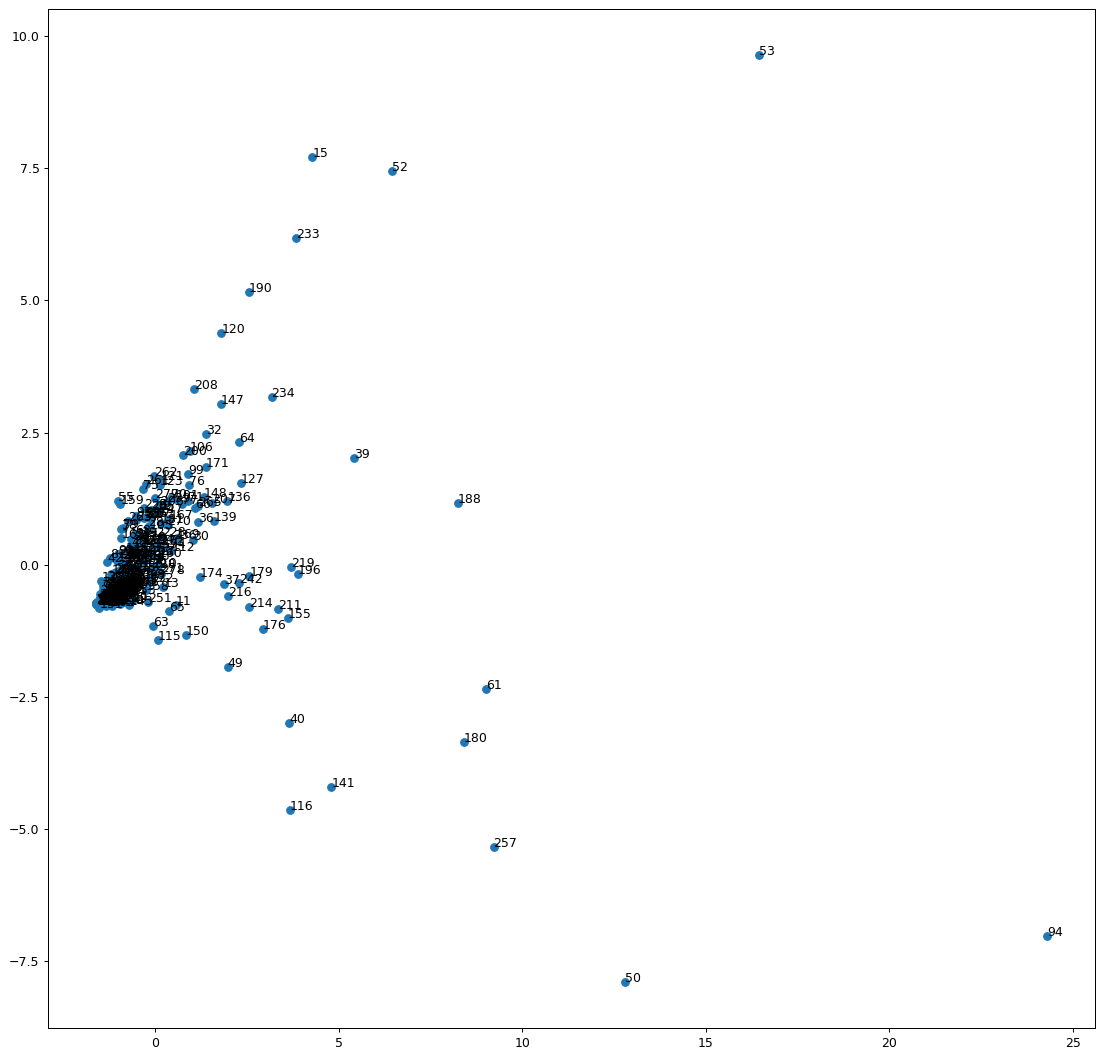

In [228]:
#Пункт 5

p5 = data.loc[:,'Avg-Avg-О2011':]
scaler = preprocessing.StandardScaler().fit(p5)
Ds = scaler.transform(p5)

objPCA = PCA(n_components=2)
objPCA.fit(Ds)

print('Объясняемая доля дисперсии',objPCA.explained_variance_ratio_)
print('Собственные значения',objPCA.singular_values_)

Components = objPCA.fit_transform(Ds)
PrincipianComp = pd.DataFrame(data = Components, columns = ['component 1', 'component 2'])

plt.figure(figsize=(15,15), dpi = 90)
plt.scatter(PrincipianComp['component 1'],PrincipianComp['component 2'])

for i in range(len(PrincipianComp.index)):
    plt.annotate(p5.index[i], (PrincipianComp['component 1'][i],PrincipianComp['component 2'][i]))
    

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
Avg-Avg-О2011,24.125,4.000000,35.2500,0.00,6.50,11.350000,40.283333,2.791667,3.000000,36.229167,...,38.5000,30.5000,7.5000,19.512500,9.0,19.6500,35.810833,35.666667,56.517857,8.666667
Avg-Avg-О2012,9.275,2.333333,7.5000,0.00,2.00,6.000000,11.245238,0.458333,0.666667,13.020833,...,10.7500,22.2500,6.5000,7.844444,2.0,5.3000,11.278333,11.833333,18.764286,3.666667
Avg-Avg-О2013,11.900,1.666667,39.1250,0.00,5.50,10.400000,32.333333,3.291667,3.333333,38.516667,...,28.2500,20.5000,10.5000,18.991667,8.0,22.2750,22.063333,31.500000,29.732143,14.666667
Avg-Avg-О2014,7.400,0.000000,5.0000,0.00,0.00,1.900000,12.083333,0.416667,2.000000,37.228750,...,13.0500,8.2500,14.5000,14.666667,12.0,4.2500,19.741667,2.063333,32.877381,3.000000
Avg-Avg-О202,45.325,0.000000,1.7500,0.00,0.00,2.125000,0.511905,53.625000,0.000000,67.025000,...,0.0000,6.2500,0.0000,32.750000,0.0,15.1250,20.868333,1.666667,87.051905,0.000000
Avg-Avg-О203,3.025,2.333333,4.9750,0.00,3.00,4.025000,38.666667,1.000000,0.000000,6.879167,...,44.8250,33.8750,0.0000,1.000000,3.0,17.4900,26.770000,12.128333,5.051786,5.666667
Avg-Avg-О204,7.045,8.000000,61.3500,0.00,7.00,13.837500,48.647619,9.850000,5.000000,9.241667,...,97.0250,32.3750,71.2500,3.808333,7.0,15.0450,21.188333,128.416667,3.180357,6.333333
Avg-Avg-О205,0.250,0.666667,46.2500,0.00,0.00,16.712500,18.444048,5.166667,0.333333,13.056250,...,47.0000,48.7500,0.0000,14.500000,3.0,19.6950,17.396667,42.800000,2.892857,5.666667
Avg-Avg-О211,734554.250,10070.633333,77963.2475,1777.50,1262.15,73236.898125,96000.220317,124368.941667,31479.533333,544348.857083,...,46500.8750,121679.6250,507898.5000,372970.804444,20439.4,221361.6432,72362.614417,6913.950000,148319.210000,47274.440000
Avg-Avg-О212,135482.275,7003.233333,47456.7450,533.35,495.95,57448.135000,37423.389489,48234.920833,919.100000,559381.817500,...,29193.4250,32540.7975,175853.2500,83915.095000,1807.5,190348.8835,53238.751667,67449.916667,96814.466548,12366.270000


Объясняемая доля дисперсии [0.6735441  0.15061287]
Собственные значения [56.72318886 26.8230807 ]


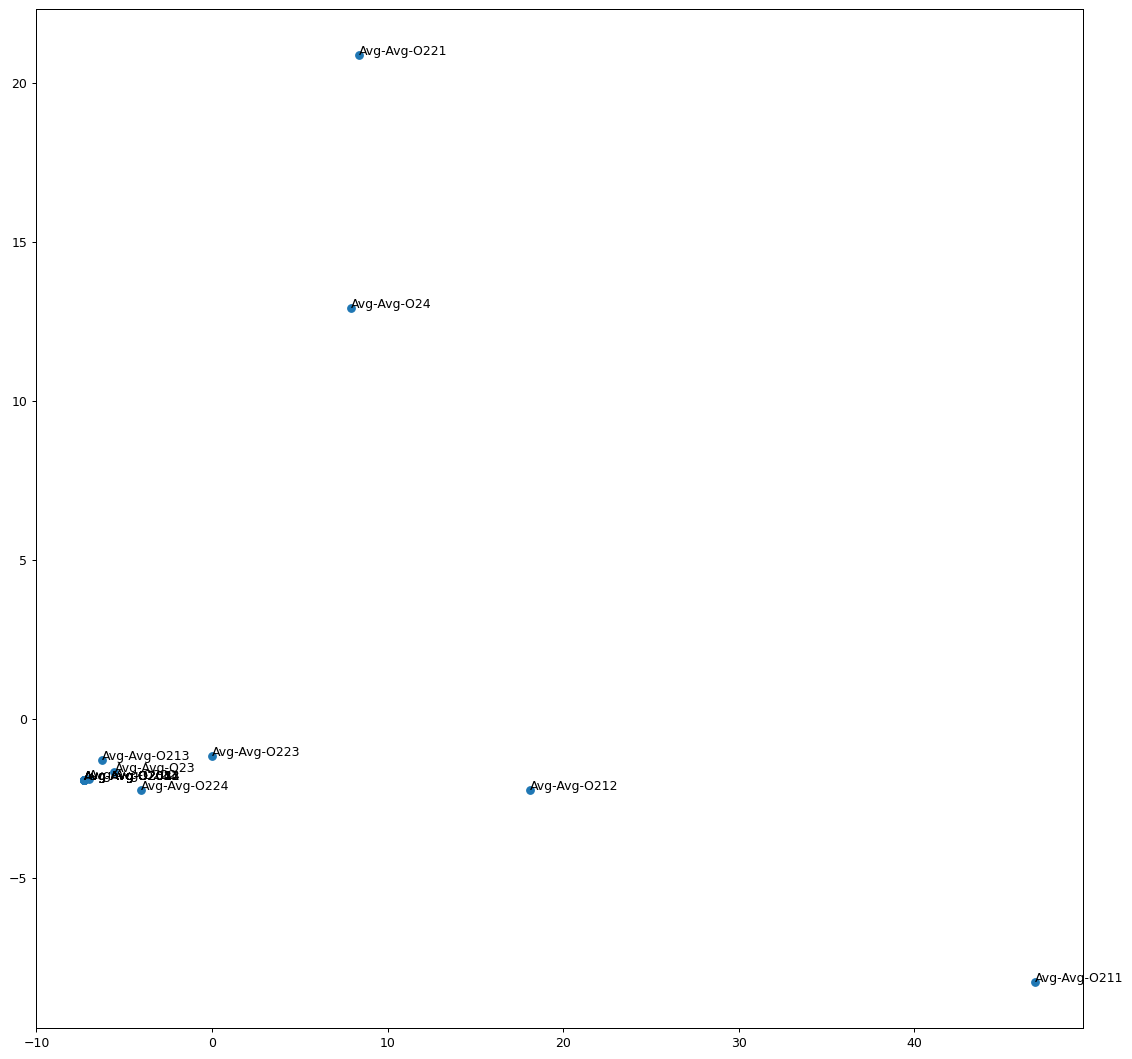

In [229]:
#Пункт 6

p5 = data.loc[:,'Avg-Avg-О2011':]
Ds = np.transpose(p5)

display(Ds)

scaler = preprocessing.StandardScaler().fit(Ds)
Ts = scaler.transform(Ds)

objPCA = PCA(n_components=2)
objPCA.fit(Ts)

print('Объясняемая доля дисперсии',objPCA.explained_variance_ratio_)
print('Собственные значения',objPCA.singular_values_)

Components = objPCA.fit_transform(Ts)
PrincipianComp = pd.DataFrame(data = Components, columns = ['component 1', 'component 2'])

plt.figure(figsize=(15,15), dpi = 90)
plt.scatter(PrincipianComp['component 1'],PrincipianComp['component 2'])

for i in range(len(PrincipianComp.index)):
    plt.annotate(Ds.index[i], (PrincipianComp['component 1'][i],PrincipianComp['component 2'][i]))
    

In [230]:
#Пункт 7 

last_data = data.loc[:,'Avg-Avg-О2011':]

#Кол-во компонент. Не меньше 1 и не больше кол-ва столбцов - 1.
count_comp = 3

#Все происходит в цикле, т.к. каждый раз надо выбирать новые столбцы для матриц P и W.
for i in range(100):

    #Случайная выборка нескольких элементов последовательности без замены.
    matr_P_col = random.sample(list(last_data.columns), count_comp)

    #Выбираем столбцы для матрицы W. Важно! Они не должны повторяться со стообцами из матрицы P.
    matr_W_col = [col for col in last_data.columns if col not in matr_P_col]

    #Создаем матрицы P и W.
    P = last_data[matr_P_col]
    W = last_data[matr_W_col]

    #Проводим стандартизацию обеих матриц.
    scaler = preprocessing.StandardScaler().fit(W)
    Ws = scaler.transform(W)
    scaler = preprocessing.StandardScaler().fit(P)
    Ps = scaler.transform(P)

    #Используем встроенный метод CCA.
    obj_CCA = CCA(n_components = count_comp, scale = False, copy = False)
    obj_CCA.fit(Ps, Ws)

    U, V = obj_CCA.transform(Ps, Ws)

    Data_UV = pd.DataFrame()
    for i in range(U.shape[1]):
        Data_UV['U' + str(i)] = U[:, i]
    for j in range(V.shape[1]):
        Data_UV['V' + str(j)] = V[:, j]


display(Data_UV)
Fd = Data_UV.corr()
Fd.style.background_gradient(cmap = 'plasma')

,U0,U1,U2,V0,V1,V2
0,2.690594e-16,-6.989377e-17,-7.538039e-17,1.229317e-17,-1.552744e-17,-9.876392e-18
1,-3.088466e-17,2.639466e-17,2.391627e-17,-2.476481e-16,4.495708e-17,-3.895694e-17
2,2.350842e-16,-1.767813e-17,-6.782996e-17,6.240055e-17,-2.179745e-17,4.541715e-17
3,5.078179e-17,-8.388020e-18,2.418060e-17,-1.092654e-16,6.217631e-17,-1.034083e-17
4,1.246204e-16,-3.093908e-17,5.756578e-18,-5.115369e-17,1.518842e-17,-3.800104e-18
...,...,...,...,...,...,...
276,2.419271e-16,-7.852699e-17,1.877861e-17,-8.103552e-17,2.563244e-17,-3.445872e-17
277,2.805256e-16,-1.775682e-16,-1.595455e-16,4.397089e-17,1.170325e-16,-2.015642e-17
278,3.110720e-16,6.784619e-17,-8.186429e-17,4.746869e-17,5.693300e-17,-8.247826e-18
279,4.172768e-16,-3.341251e-16,-1.622336e-16,1.912940e-16,-7.143766e-17,4.857299e-17


,U0,U1,U2,V0,V1,V2
U0,1.000000,-0.148433,-0.076013,0.670923,0.084248,0.360637
U1,-0.148433,1.000000,0.050486,-0.172303,0.475209,-0.105491
U2,-0.076013,0.050486,1.000000,-0.023799,-0.004650,-0.105836
V0,0.670923,-0.172303,-0.023799,1.000000,0.073134,0.478176
V1,0.084248,0.475209,-0.004650,0.073134,1.000000,0.032550
V2,0.360637,-0.105491,-0.105836,0.478176,0.032550,1.000000
